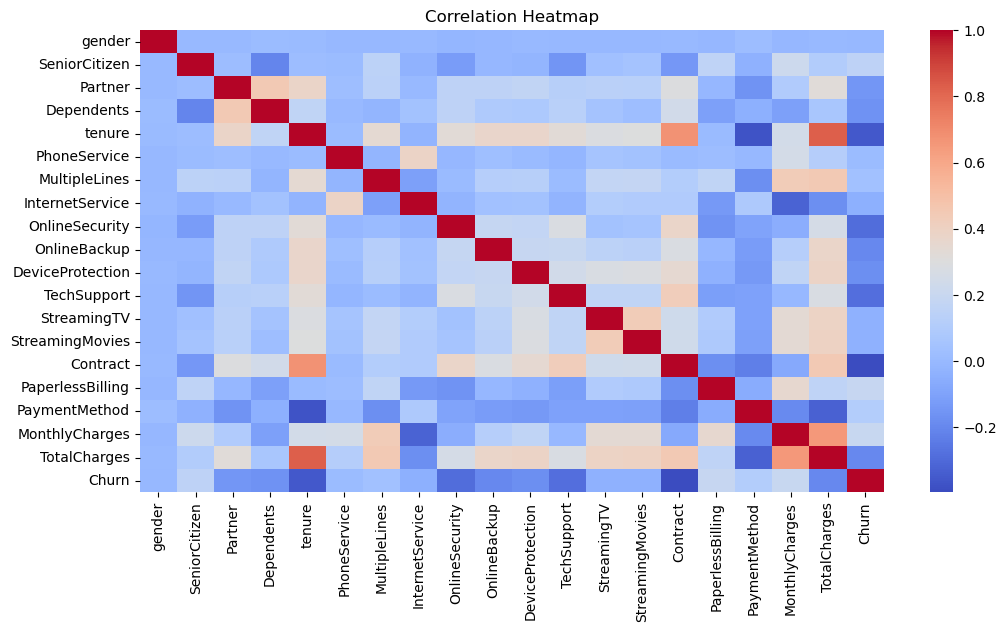

                 Model  Accuracy
2        Random Forest  0.783937
0  Logistic Regression  0.782516
3                  KNN  0.773276
4                  SVM  0.734186
1        Decision Tree  0.722104


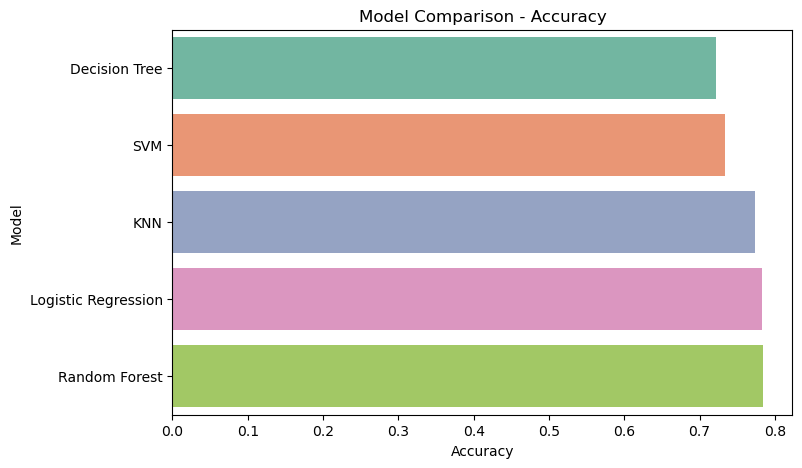

Confusion Matrix:
 [[913 120]
 [186 188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv('churn.csv')

# Drop customer ID column if present
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()  # drop rows with missing TotalCharges

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Compare Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Accuracy Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df.sort_values("Accuracy", ascending=False))

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df.sort_values("Accuracy"), palette="Set2")
plt.title("Model Comparison - Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# Final Best Model: Logistic Regression
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))
print("\nClassification Report:\n", classification_report(y_test, final_preds))
